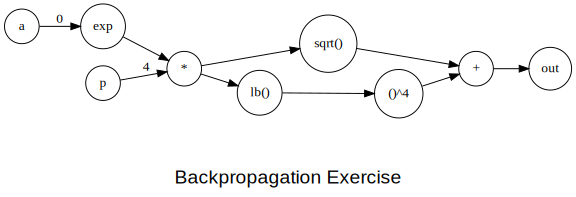

In [1]:
# fsm.py - http://www.graphviz.org/content/fsm

from graphviz import Digraph

f = Digraph('backpropagation exercise', filename='backpropagation.gv')

f.attr(label=r'\n\nBackpropagation Exercise')
f.attr(fontsize='20')
f.attr(fontname='arial')

f.attr(rankdir='LR', size='8,5')

f.attr('node', shape='circle')
f.node('a')
f.node('p')
f.node('exp')
f.node('*')
f.node('sqrt()')
f.node('lb()')
f.node('()^4')
f.node('+')
f.node('out')

f.edge('a', 'exp', label='0')
f.edge('exp', '*', label='')

f.edge('p', '*', label='4')

f.edge('*', 'sqrt()', label='')
f.edge('sqrt()', '+', label='')

f.edge('*', 'lb()', label='')
f.edge('lb()', '()^4', label='')
f.edge('()^4', '+', label='')
f.edge('+', 'out', label='')

f

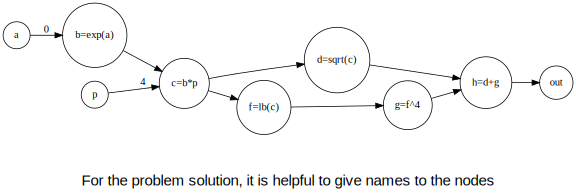

In [2]:
f = Digraph('backpropagation exercise', filename='backpropagation.gv')

f.attr(label=r'\n\nFor the problem solution, it is helpful to give names to the nodes')
f.attr(fontsize='20')
f.attr(fontname='arial')

f.attr(rankdir='LR', size='8,5')

f.attr('node', shape='circle')
f.node('a')
f.node('p')
f.node('b=exp(a)')
f.node('c=b*p')
f.node('d=sqrt(c)')
f.node('f=lb(c)')
f.node('g=f^4')
f.node('h=d+g')
f.node('out')

f.edge('a', 'b=exp(a)', label='0')
f.edge('b=exp(a)', 'c=b*p', label='')

f.edge('p', 'c=b*p', label='4')

f.edge('c=b*p', 'd=sqrt(c)', label='')
f.edge('d=sqrt(c)', 'h=d+g', label='')

f.edge('c=b*p', 'f=lb(c)', label='')
f.edge('f=lb(c)', 'g=f^4', label='')
f.edge('g=f^4', 'h=d+g', label='')
f.edge('h=d+g', 'out', label='')

f

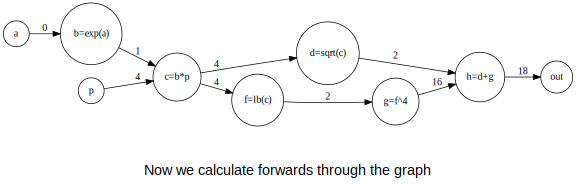

In [3]:
f = Digraph('backpropagation exercise', filename='backpropagation.gv')

f.attr(label=r'\n\nNow we calculate forwards through the graph')
f.attr(fontsize='20')
f.attr(fontname='arial')

f.attr(rankdir='LR', size='8,5')

f.attr('node', shape='circle')
f.node('a')
f.node('p')
f.node('b=exp(a)')
f.node('c=b*p')
f.node('d=sqrt(c)')
f.node('f=lb(c)')
f.node('g=f^4')
f.node('h=d+g')
f.node('out')

f.edge('a', 'b=exp(a)', label='0')
f.edge('b=exp(a)', 'c=b*p', label='1')

f.edge('p', 'c=b*p', label='4')

f.edge('c=b*p', 'd=sqrt(c)', label='4')
f.edge('d=sqrt(c)', 'h=d+g', label='2')

f.edge('c=b*p', 'f=lb(c)', label='4')
f.edge('f=lb(c)', 'g=f^4', label='2')
f.edge('g=f^4', 'h=d+g', label='16')
f.edge('h=d+g', 'out', label='18')

f

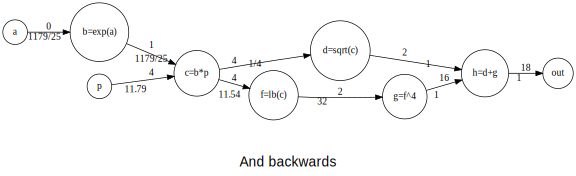

In [4]:
f = Digraph('backpropagation exercise', filename='backpropagation.gv')

f.attr(label=r'\n\nAnd backwards')
f.attr(fontsize='20')
f.attr(fontname='arial')

f.attr(rankdir='LR', size='8,5')

f.attr('node', shape='circle')
f.node('a')
f.node('p')
f.node('b=exp(a)')
f.node('c=b*p')
f.node('d=sqrt(c)')
f.node('f=lb(c)')
f.node('g=f^4')
f.node('h=d+g')
f.node('out')

f.edge('a', 'b=exp(a)', label='  0   ', taillabel=' 1179/25')
f.edge('b=exp(a)', 'c=b*p', label='   1   ', headlabel='1179/25       ')

f.edge('p', 'c=b*p', label='4', taillabel='          11.79')

f.edge('c=b*p', 'd=sqrt(c)', label='4', taillabel='                       1/4')
f.edge('d=sqrt(c)', 'h=d+g', label='2', headlabel='1                        ')

f.edge('c=b*p', 'f=lb(c)', label='4', taillabel=' \n11.54')
f.edge('f=lb(c)', 'g=f^4', label='2', taillabel='               32')
f.edge('g=f^4', 'h=d+g', label='16', taillabel='      1')
f.edge('h=d+g', 'out', label='18', taillabel='      1')

f

$out(a, p) = \sqrt{e^{a} \cdot p} + (\log_2(e^{a} \cdot p))^{4}$
<br>
<br>
$\frac{\partial out}{\partial h_g} = \frac{\partial out}{\partial h_g} \cdot \frac{\partial out}{\partial out}$
<br>
$\rightarrow \frac{\partial out}{\partial h_g} = 1$
<br>
<br>
analogical calculation for:
$\frac{\partial out}{\partial h_d} = 1$
<br>
<br>

$\frac{\partial out}{\partial g_f} = \frac{\partial h_g}{\partial g_f} \cdot \frac{\partial out}{\partial h_g}$
<br>
$\frac{\partial h_g}{\partial g_f} = 4 \cdot f^{3}$
<br>
$\rightarrow \frac{\partial out}{\partial g_f} = 4 \cdot 2^{3} \cdot 1 = 32$
<br>
<br>

$\frac{\partial out}{\partial f_c} = \frac{\partial g_f}{\partial f_c} \cdot \frac{\partial out}{\partial g_f}$
<br>
$\frac{\partial g_f}{\partial f_c} = \frac{1}{c \cdot \ln2}$
<br>
$\rightarrow \frac{\partial out}{\partial f_c} = \frac{1}{4 \cdot \ln2} \cdot 32 = 11.54$
<br>
<br>

$\frac{\partial out}{\partial d_c} = \frac{\partial h_d}{\partial d_c} \cdot \frac{\partial out}{\partial h_d}$
<br>
$\frac{\partial h_d}{\partial d_c} = \frac{1}{2 \cdot \sqrt{c}}$
<br>
$\rightarrow \frac{\partial out}{\partial d_c} = \frac{1}{2 \cdot \sqrt{4}} \cdot 1 = \frac{1}{4}$
<br>
<br>

$\frac{\partial out}{\partial c_b} = \frac{\partial d_c}{\partial c_b} \cdot \frac{\partial out}{\partial d_c} + \frac{\partial f_c}{\partial c_b} \cdot \frac{\partial out}{\partial f_c}$
<br>
$\frac{\partial d_c}{\partial c_b} = p$
<br>
$\frac{\partial f_c}{\partial c_b} = p$
<br>
$\rightarrow \frac{\partial out}{\partial c_b} = 4 \cdot (\frac{1}{4}) + 4 \cdot 11.54 = \frac{1179}{25}$
<br>
<br>
analogical calculation for:
<br>
$\frac{\partial out}{\partial c_p} = \frac{\partial d_c}{\partial c_p} \cdot \frac{\partial out}{\partial d_c} + \frac{\partial f_c}{\partial c_p} \cdot \frac{\partial out}{\partial f_c}$
<br>
$\frac{\partial d_c}{\partial c_p} = b$
<br>
$\frac{\partial f_c}{\partial c_p} = b$
<br>
$\rightarrow \frac{\partial out}{\partial c_p} = 1 \cdot (\frac{1}{4}) + 1 \cdot 11.54 = 11.79$
<br>
<br>

$\frac{\partial out}{\partial b_a} = \frac{\partial c_b}{\partial b_a} \cdot \frac{\partial out}{\partial c_b}$
<br>
$\frac{\partial c_b}{\partial b_a} = e^{a}$
<br>
$\rightarrow \frac{\partial out}{\partial b_a} = e^{0} \cdot \frac{1179}{25} = \frac{1179}{25}$